# **Importing Libraries**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import math

# **Reading CSV Files**

In [ ]:
batting=pd.read_csv("/content/odi_Batting_Card.csv")

In [ ]:
bowling=pd.read_csv("/content/odi_Bowling_Card.csv")

In [ ]:
players=pd.read_csv("/content/players_info.csv")

In [ ]:
partnership=pd.read_csv("/content/odi_Partnership_Card.csv")

In [ ]:
batting.head()
batting['Centuries'] = np.where(batting['runs'] >= 100, 1, 0)
batting

,Match ID,innings,team,batsman,runs,balls,fours,sixes,strikeRate,isOut,wicketType,fielders,bowler,Centuries
0,64381,1,Sri Lanka,1810.0,5.0,17.0,0.0,0.0,29.41,True,lbw,NaN,NaN,0
1,64357,1,Pakistan,1981.0,35.0,48.0,2.0,0.0,72.91,True,caught,['1977'],NaN,0
2,65455,1,Australia,1922.0,16.0,30.0,1.0,0.0,53.33,True,caught,['1945'],NaN,0
3,64381,1,Sri Lanka,1987.0,6.0,46.0,0.0,0.0,13.04,True,caught,['1980'],NaN,0
4,64357,1,Pakistan,1750.0,114.0,123.0,14.0,0.0,92.68,True,run out,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103220,1421073,2,Canada,106864.0,20.0,29.0,2.0,0.0,68.96,False,not out,['-'],NaN,0
103221,1421073,2,Canada,95122.0,NaN,NaN,NaN,NaN,NaN,False,DNB,NaN,NaN,0
103222,1421073,2,Canada,58923.0,NaN,NaN,NaN,NaN,NaN,False,DNB,NaN,NaN,0
103223,1421073,2,Canada,57366.0,NaN,NaN,NaN,NaN,NaN,False,DNB,NaN,NaN,0


In [ ]:
bowling.head()

,Match ID,innings,team,opposition,bowler id,overs,balls,maidens,conceded,wickets,economy,dots,fours,sixes,wides,noballs
0,433599,1,West Indies,India,45258.0,10.0,60.0,0.0,51.0,5.0,5.10,29.0,4.0,0.0,1.0,0.0
1,446965,1,Australia,England,5966.0,8.0,48.0,0.0,68.0,1.0,8.50,18.0,5.0,2.0,1.0,0.0
2,433566,1,Ireland,Bangladesh,47056.0,9.0,54.0,0.0,62.0,0.0,6.88,28.0,8.0,0.0,4.0,0.0
3,446965,1,Australia,England,45487.0,9.0,54.0,0.0,55.0,0.0,6.11,26.0,8.0,0.0,1.0,0.0
4,433599,1,West Indies,India,10506.0,4.0,24.0,0.0,32.0,0.0,8.00,10.0,6.0,0.0,0.0,0.0


In [ ]:
print(players['dob'].isnull().sum())  # Check for missing values
print(players['dob'].dtype)  # Check the data type
print(players['dob'].head())  # Inspect a few values
players['dob'].fillna(0, inplace=True)  # Replace missing values with 0
players['dob'].isnull().sum()



27
object
0    1982-01-24
1    1970-11-01
2    1989-03-20
3    1976-11-25
4    1990-07-21
Name: dob, dtype: object


<ipython-input-91-9af8c14efa1e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  players['dob'].fillna(0, inplace=True)  # Replace missing values with 0


0

In [ ]:

def convert_to_ymd(age_in_years):
  if pd.isna(age_in_years):
        return float('nan')
  years = math.floor(age_in_years)
  remaining_fraction = age_in_years - years
  months = math.floor(remaining_fraction * 12)
  days = math.floor((remaining_fraction * 12 - months) * 30)
  return (f"{years} years, {months} months, {days} days")


In [ ]:
players['dob'].fillna(pd.NaT, inplace=True)
players['dob'] = pd.to_datetime(players['dob'], errors='coerce')
players['dob']= pd.to_datetime(players['dob'])
curr_date = pd.to_datetime('today')
players['Age']= ((curr_date-players['dob']).dt.days)/365
players['Age']=players['Age'].apply(convert_to_ymd)
players.head(5)

,player_id,player_object_id,player_name,dob,dod,gender,batting_style,bowling_style,country_id,image_url,image_metadata,Age
0,93957,1046619,Avinash Pai,1982-01-24,NaN,M,right-hand bat,right-arm offbreak,18.0,NaN,NaN,"42 years, 11 months, 9 days"
1,2182,51462,Sherwin Campbell,1970-11-01,NaN,M,right-hand bat,right-arm medium,4.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 326616, 'url': '/db/PICTURES/CMS/326600...","54 years, 2 months, 5 days"
2,48391,56194,Tamim Iqbal,1989-03-20,NaN,M,left-hand bat,NaN,25.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 303166, 'url': '/db/PICTURES/CMS/303100...","35 years, 9 months, 13 days"
3,2198,55935,Javed Omar,1976-11-25,NaN,M,right-hand bat,legbreak,25.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 302990, 'url': '/db/PICTURES/CMS/302900...","48 years, 1 months, 9 days"
4,52290,298438,Jason Roy,1990-07-21,NaN,M,right-hand bat,NaN,1.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 303963, 'url': '/db/PICTURES/CMS/303900...","34 years, 5 months, 11 days"


In [ ]:
players.head(5)

,player_id,player_object_id,player_name,dob,dod,gender,batting_style,bowling_style,country_id,image_url,image_metadata,Age
0,93957,1046619,Avinash Pai,1982-01-24,NaN,M,right-hand bat,right-arm offbreak,18.0,NaN,NaN,"42 years, 11 months, 9 days"
1,2182,51462,Sherwin Campbell,1970-11-01,NaN,M,right-hand bat,right-arm medium,4.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 326616, 'url': '/db/PICTURES/CMS/326600...","54 years, 2 months, 5 days"
2,48391,56194,Tamim Iqbal,1989-03-20,NaN,M,left-hand bat,NaN,25.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 303166, 'url': '/db/PICTURES/CMS/303100...","35 years, 9 months, 13 days"
3,2198,55935,Javed Omar,1976-11-25,NaN,M,right-hand bat,legbreak,25.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 302990, 'url': '/db/PICTURES/CMS/302900...","48 years, 1 months, 9 days"
4,52290,298438,Jason Roy,1990-07-21,NaN,M,right-hand bat,NaN,1.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 303963, 'url': '/db/PICTURES/CMS/303900...","34 years, 5 months, 11 days"


In [ ]:
players[players['player_id']==1750.0]

,player_id,player_object_id,player_name,dob,dod,gender,batting_style,bowling_style,country_id,image_url,image_metadata,Age
287,1750,42420,Ramiz Raja,1962-08-14,NaN,M,right-hand bat,legbreak,7.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 302720, 'url': '/db/PICTURES/CMS/302700...","62 years, 4 months, 24 days"


In [ ]:
partnership.head()

,Match ID,innings,for wicket,team,opposition,player1,player2,player1 runs,player2 runs,player1 balls,player2 balls,partnership runs,partnership balls
0,489214,1,1.0,West Indies,Pakistan,10494.0,45256.0,16.0,4.0,21.0,12.0,24.0,33.0
1,489214,1,2.0,West Indies,Pakistan,45256.0,51054.0,18.0,12.0,16.0,18.0,34.0,34.0
2,489214,1,3.0,West Indies,Pakistan,10238.0,45256.0,3.0,29.0,36.0,20.0,32.0,56.0
3,489214,1,4.0,West Indies,Pakistan,10238.0,47110.0,13.0,4.0,7.0,12.0,18.0,19.0
4,489214,1,5.0,West Indies,Pakistan,10238.0,45257.0,13.0,17.0,31.0,20.0,36.0,51.0


# **Merging batting and players datasets**

In [ ]:
merged_df=pd.merge(batting,players,left_on='batsman',right_on='player_id',how="inner")
merged_df['isOut'] = merged_df['isOut'].replace({True: 1, False: 0})
merged_df.head()

<ipython-input-97-6a2dd02d8f22>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['isOut'] = merged_df['isOut'].replace({True: 1, False: 0})


,Match ID,innings,team,batsman,runs,balls,fours,sixes,strikeRate,isOut,...,player_name,dob,dod,gender,batting_style,bowling_style,country_id,image_url,image_metadata,Age
0,64381,1,Sri Lanka,1810.0,5.0,17.0,0.0,0.0,29.41,1,...,Roshan Mahanama,1966-05-31,NaN,M,right-hand bat,NaN,8.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 304915, 'url': '/db/PICTURES/CMS/304900...","58 years, 7 months, 7 days"
1,64357,1,Pakistan,1981.0,35.0,48.0,2.0,0.0,72.91,1,...,Saeed Anwar,1968-09-06,NaN,M,left-hand bat,slow left-arm orthodox,7.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 21439, 'url': '/db/PICTURES/DB/052004/0...","56 years, 4 months, 0 days"
2,65455,1,Australia,1922.0,16.0,30.0,1.0,0.0,53.33,1,...,Mark Taylor,1964-10-27,NaN,M,left-hand bat,right-arm medium,2.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 86318, 'url': '/db/PICTURES/CMS/86300/8...","60 years, 2 months, 11 days"
3,64381,1,Sri Lanka,1987.0,6.0,46.0,0.0,0.0,13.04,1,...,Chandika Hathurusinghe,1968-09-13,NaN,M,right-hand bat,right-arm medium-fast,8.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 304918, 'url': '/db/PICTURES/CMS/304900...","56 years, 3 months, 23 days"
4,64357,1,Pakistan,1750.0,114.0,123.0,14.0,0.0,92.68,1,...,Ramiz Raja,1962-08-14,NaN,M,right-hand bat,legbreak,7.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 302720, 'url': '/db/PICTURES/CMS/302700...","62 years, 4 months, 24 days"


In [ ]:
merged_df.head(2)

,Match ID,innings,team,batsman,runs,balls,fours,sixes,strikeRate,isOut,...,player_name,dob,dod,gender,batting_style,bowling_style,country_id,image_url,image_metadata,Age
0,64381,1,Sri Lanka,1810.0,5.0,17.0,0.0,0.0,29.41,1,...,Roshan Mahanama,1966-05-31,NaN,M,right-hand bat,NaN,8.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 304915, 'url': '/db/PICTURES/CMS/304900...","58 years, 7 months, 7 days"
1,64357,1,Pakistan,1981.0,35.0,48.0,2.0,0.0,72.91,1,...,Saeed Anwar,1968-09-06,NaN,M,left-hand bat,slow left-arm orthodox,7.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 21439, 'url': '/db/PICTURES/DB/052004/0...","56 years, 4 months, 0 days"


In [ ]:
merged_df2=pd.merge(bowling,players,left_on='bowler id',right_on='player_id',how="inner")
merged_df2.head()

,Match ID,innings,team,opposition,bowler id,overs,balls,maidens,conceded,wickets,...,player_name,dob,dod,gender,batting_style,bowling_style,country_id,image_url,image_metadata,Age
0,433599,1,West Indies,India,45258.0,10.0,60.0,0.0,51.0,5.0,...,Ravi Rampaul,1984-10-15,NaN,M,left-hand bat,right-arm fast-medium,4.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 203291, 'url': '/db/PICTURES/CMS/203200...","40 years, 2 months, 17 days"
1,446965,1,Australia,England,5966.0,8.0,48.0,0.0,68.0,1.0,...,Brett Lee,1976-11-08,NaN,M,right-hand bat,right-arm fast,2.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 202607, 'url': '/db/PICTURES/CMS/202600...","48 years, 1 months, 26 days"
2,433566,1,Ireland,Bangladesh,47056.0,9.0,54.0,0.0,62.0,0.0,...,Boyd Rankin,1984-07-05,NaN,M,left-hand bat,right-arm fast-medium,29.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 305274, 'url': '/db/PICTURES/CMS/305200...","40 years, 5 months, 28 days"
3,446965,1,Australia,England,45487.0,9.0,54.0,0.0,55.0,0.0,...,Doug Bollinger,1981-07-24,NaN,M,left-hand bat,left-arm fast-medium,2.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 128313, 'url': '/db/PICTURES/CMS/128300...","43 years, 5 months, 10 days"
4,433599,1,West Indies,India,10506.0,4.0,24.0,0.0,32.0,0.0,...,Sulieman Benn,1981-07-22,NaN,M,left-hand bat,slow left-arm orthodox,4.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 238339, 'url': '/db/PICTURES/CMS/238300...","43 years, 5 months, 12 days"


# **BATTING STATISTICS IN ODI**

## *Summary Table*



In [ ]:
batsman_df=merged_df.groupby(['player_name','team',"batting_style"]).agg({'runs':'sum','isOut':'sum','sixes':'sum','fours':'sum','strikeRate':'mean',"Centuries":"sum"})
# batsman_df=merged_df.groupby(['player_name','team','batting_style']).agg({'runs':'sum','isOut':'count','sixes':'sum','fours':'sum','strikeRate':'mean',"Centuries":"sum"})
batsman_df['average']=batsman_df['runs']/batsman_df['isOut']
batsman_df.sort_values(by='runs',ascending=False,inplace=True)
batsman_df['Highest_Score']=merged_df.groupby(['player_name','team'])['runs'].max()
batsman_df['NotOut']=merged_df[merged_df['wicketType']=='not out'].groupby(['player_name','team'])['wicketType'].count()
batsman_df['BowledOut']=merged_df[merged_df['isOut']==0].groupby(['player_name','team'])['wicketType'].count()
batsman_df['LBW']=merged_df[merged_df['wicketType']=='lbw'].groupby(['player_name','team'])['wicketType'].count()
batsman_df['Caught']=merged_df[merged_df['wicketType']=='caught'].groupby(['player_name','team'])['wicketType'].count()
batsman_df.rename(columns={'player_name':'Name',"team":"Country","runs":"Runs","innings":"Total Innings","isOut":"Out","sixes":"6s","fours":"4s","strikeRate":"SR","average":"Average"},inplace=True)
batsman_df["Total Half Centuries"]=merged_df[(merged_df['runs']>=50) & (merged_df['runs']<100)].groupby(['player_name','team'])['runs'].count()
batsman_df["Total Centuries"]=merged_df[merged_df['Centuries']==1].groupby(['player_name','team'])['Centuries'].count()
batsman_df['Total Innings']=batsman_df['NotOut']+batsman_df['Out']
batsman_df.fillna(0,inplace=True)
batsman_df.reset_index(inplace=True)
batsman_df.insert(3,'Total Innings',batsman_df.pop('Total Innings'))
batsman_df.head(2)


,player_name,team,batting_style,Total Innings,Runs,Out,6s,4s,SR,Centuries,Average,Highest_Score,NotOut,BowledOut,LBW,Caught,Total Half Centuries,Total Centuries
0,Sachin Tendulkar,India,right-hand bat,451.0,18426.0,411,195.0,2016.0,74.580332,49,44.832117,200.0,40.0,46.0,39.0,258.0,96.0,49.0
1,Kumar Sangakkara,Sri Lanka,left-hand bat,373.0,13975.0,333,86.0,1349.0,71.451153,25,41.966967,169.0,40.0,57.0,22.0,235.0,90.0,25.0


## *Top 10 Highest Scorer*

In [ ]:
top_10_highest_scorer=merged_df.groupby(['player_name','team'])['runs'].sum().sort_values(ascending=False).head(10)
top_10_highest_scorer

,,runs
player_name,team,
Sachin Tendulkar,India,18426.0
Kumar Sangakkara,Sri Lanka,13975.0
Virat Kohli,India,13848.0
Ricky Ponting,Australia,13589.0
Sanath Jayasuriya,Sri Lanka,13364.0
Mahela Jayawardene,Sri Lanka,12381.0
Inzamam-ul-Haq,Pakistan,11701.0
Jacques Kallis,South Africa,11550.0
Sourav Ganguly,India,11221.0


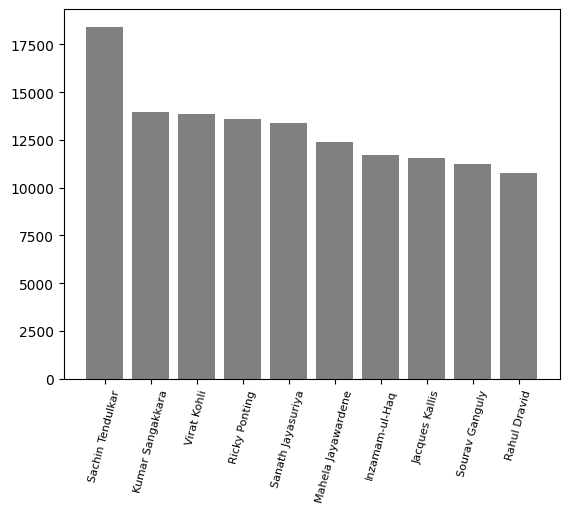

In [ ]:
x=top_10_highest_scorer.index.get_level_values('player_name')
y=top_10_highest_scorer.values
plt.bar(x,y,color='grey')
plt.xticks(rotation=75,fontsize=8)
plt.show()


## *Highest Centuries*

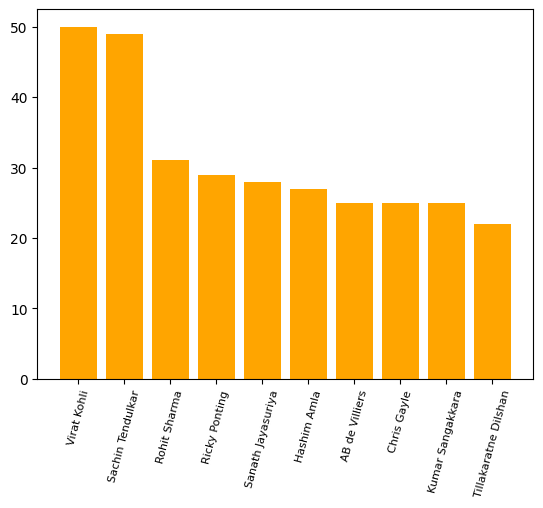

In [ ]:
top_hc=batsman_df.sort_values(by='Total Centuries',ascending=False).head(10)
top_hc
x=top_hc['player_name']
y=top_hc['Total Centuries']
plt.bar(x,y,color='orange')
plt.xticks(rotation=75,fontsize=8)
plt.show()

## *Top Right Handed Batsmen*

In [ ]:
top_rhb=batsman_df[batsman_df['batting_style']=='right-hand bat'].sort_values(by='Runs',ascending=False).head(10)
top_rhb

,player_name,team,batting_style,Total Innings,Runs,Out,6s,4s,SR,Centuries,Average,Highest_Score,NotOut,BowledOut,LBW,Caught,Total Half Centuries,Total Centuries
0,Sachin Tendulkar,India,right-hand bat,451.0,18426.0,411,195.0,2016.0,74.580332,49,44.832117,200.0,40.0,46.0,39.0,258.0,96.0,49.0
2,Virat Kohli,India,right-hand bat,280.0,13848.0,236,151.0,1294.0,80.574214,50,58.677966,183.0,44.0,52.0,16.0,168.0,72.0,50.0
3,Ricky Ponting,Australia,right-hand bat,363.0,13589.0,325,159.0,1223.0,69.364286,29,41.812308,164.0,38.0,47.0,34.0,212.0,82.0,29.0
5,Mahela Jayawardene,Sri Lanka,right-hand bat,413.0,12381.0,375,71.0,1098.0,66.579419,18,33.016000,144.0,38.0,61.0,39.0,242.0,75.0,18.0
6,Inzamam-ul-Haq,Pakistan,right-hand bat,348.0,11701.0,296,143.0,970.0,67.421149,10,39.530405,137.0,52.0,79.0,39.0,166.0,83.0,10.0
7,Jacques Kallis,South Africa,right-hand bat,308.0,11550.0,256,137.0,910.0,63.966861,17,45.117188,139.0,52.0,66.0,17.0,168.0,86.0,17.0
9,Rahul Dravid,India,right-hand bat,314.0,10768.0,275,42.0,942.0,66.948471,12,39.156364,153.0,39.0,60.0,25.0,152.0,82.0,12.0
10,Rohit Sharma,India,right-hand bat,253.0,10709.0,218,323.0,994.0,75.745906,31,49.123853,264.0,35.0,41.0,22.0,141.0,55.0,31.0
11,MS Dhoni,India,right-hand bat,294.0,10599.0,211,222.0,809.0,87.884490,9,50.232227,183.0,83.0,131.0,18.0,138.0,73.0,9.0
14,Tillakaratne Dilshan,Sri Lanka,right-hand bat,303.0,10290.0,262,55.0,1111.0,81.505842,22,39.274809,161.0,41.0,61.0,13.0,160.0,47.0,22.0


## *Top Left-Handed Batsmen*

In [ ]:
top_lhb=batsman_df[batsman_df['batting_style']=="left-hand bat"].sort_values(by='Runs',ascending=False).head(10)
top_lhb

,player_name,team,batting_style,Total Innings,Runs,Out,6s,4s,SR,Centuries,Average,Highest_Score,NotOut,BowledOut,LBW,Caught,Total Half Centuries,Total Centuries
1,Kumar Sangakkara,Sri Lanka,left-hand bat,373.0,13975.0,333,86.0,1349.0,71.451153,25,41.966967,169.0,40.0,57.0,22.0,235.0,90.0,25.0
4,Sanath Jayasuriya,Sri Lanka,left-hand bat,426.0,13364.0,411,268.0,1493.0,77.564196,28,32.515815,189.0,15.0,24.0,47.0,274.0,68.0,28.0
8,Sourav Ganguly,India,left-hand bat,295.0,11221.0,274,189.0,1104.0,64.734747,22,40.952555,183.0,21.0,28.0,19.0,182.0,71.0,22.0
12,Chris Gayle,West Indies,left-hand bat,290.0,10425.0,274,330.0,1120.0,74.787869,25,38.047445,215.0,16.0,18.0,30.0,183.0,53.0,25.0
13,Brian Lara,West Indies,left-hand bat,282.0,10348.0,253,133.0,1039.0,71.300526,19,40.901186,169.0,29.0,38.0,23.0,160.0,62.0,19.0
15,Adam Gilchrist,Australia,left-hand bat,278.0,9595.0,267,148.0,1159.0,86.662878,16,35.936330,172.0,11.0,18.0,21.0,177.0,55.0,16.0
20,Saeed Anwar,Pakistan,left-hand bat,244.0,8824.0,225,97.0,938.0,72.015533,20,39.217778,194.0,19.0,22.0,14.0,152.0,43.0,20.0
21,Shivnarine Chanderpaul,West Indies,left-hand bat,250.0,8778.0,211,85.0,722.0,68.649681,11,41.601896,150.0,39.0,53.0,22.0,143.0,59.0,11.0
23,Yuvraj Singh,India,left-hand bat,275.0,8609.0,236,153.0,896.0,77.842509,14,36.478814,150.0,39.0,62.0,25.0,157.0,52.0,14.0
27,Tamim Iqbal,Bangladesh,left-hand bat,240.0,8357.0,228,103.0,925.0,69.596750,14,36.653509,158.0,12.0,12.0,21.0,148.0,56.0,14.0


## *Highest Number of Sixes*

In [ ]:
highest_no_sixes=merged_df.groupby(['player_name','team'])[['sixes','innings']].sum().sort_values(by='sixes',ascending=False).head(10)
highest_no_sixes["sixes_per_innings"]=highest_no_sixes["sixes"]/highest_no_sixes["innings"]
highest_no_sixes

,,sixes,innings,sixes_per_innings
player_name,team,,,
Shahid Afridi,Pakistan,349.0,588,0.593537
Chris Gayle,West Indies,330.0,443,0.744921
Rohit Sharma,India,323.0,406,0.795567
Sanath Jayasuriya,Sri Lanka,268.0,648,0.413580
MS Dhoni,India,222.0,531,0.418079
Eoin Morgan,England,202.0,335,0.602985
Brendon McCullum,New Zealand,200.0,382,0.523560
AB de Villiers,South Africa,200.0,323,0.619195
Sachin Tendulkar,India,195.0,693,0.281385


## *Highest number of Fours*

In [ ]:
highest_no_fours=merged_df.groupby(['player_name','team'])[['fours','innings']].sum().sort_values(by='fours',ascending=False).head(10)
highest_no_fours['fours_per_innings']=highest_no_fours['fours']/highest_no_fours['innings']
highest_no_fours

,,fours,innings,fours_per_innings
player_name,team,,,
Sachin Tendulkar,India,2016.0,693,2.909091
Sanath Jayasuriya,Sri Lanka,1493.0,648,2.304012
Kumar Sangakkara,Sri Lanka,1349.0,559,2.413238
Virat Kohli,India,1294.0,447,2.894855
Ricky Ponting,Australia,1223.0,532,2.298872
Adam Gilchrist,Australia,1159.0,420,2.759524
Chris Gayle,West Indies,1120.0,443,2.528217
Tillakaratne Dilshan,Sri Lanka,1111.0,454,2.447137
Sourav Ganguly,India,1104.0,454,2.431718


## *Partnerships Statistics*

In [ ]:
# Select only the specified columns
partnership = partnership.merge(players[['player_id', 'player_name']],
                                 left_on='player1', right_on='player_id',
                                 how='left').rename(columns={'player_name': 'player1_name'})

# Merge for player2 names
partnership = partnership.merge(players[['player_id', 'player_name']],
                                 left_on='player2', right_on='player_id',
                                 how='left').rename(columns={'player_name': 'player2_name'})

final_partnership_df = partnership[[
    'Match ID', 'innings','team', 'opposition', 'player1_name', 'player2_name',
    'player1 runs','player2 runs','player1 balls','player2 balls',
    'for wicket', 'partnership runs',
    'partnership balls'
]]


final_partnership_df.rename(columns={
    'player1_name': 'Player 1 Name',
    'player2_name': 'Player 2 Name',
    'for wicket': 'For Wicket',
    'partnership runs': 'Partnership Runs',
    'partnership balls': 'Partnership Balls',
    'player1 runs':'Player 1 Contribution',
    'player2 runs':'Player 2 Contribution'
}, inplace=True)

# Display the cleaned DataFrame
final_partnership_df.head()


<ipython-input-108-29d3dacaf2f1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_partnership_df.rename(columns={


,Match ID,innings,team,opposition,Player 1 Name,Player 2 Name,Player 1 Contribution,Player 2 Contribution,player1 balls,player2 balls,For Wicket,Partnership Runs,Partnership Balls
0,489214,1,West Indies,Pakistan,Devon Smith,Lendl Simmons,16.0,4.0,21.0,12.0,1.0,24.0,33.0
1,489214,1,West Indies,Pakistan,Lendl Simmons,Darren Bravo,18.0,12.0,16.0,18.0,2.0,34.0,34.0
2,489214,1,West Indies,Pakistan,Marlon Samuels,Lendl Simmons,3.0,29.0,36.0,20.0,3.0,32.0,56.0
3,489214,1,West Indies,Pakistan,Marlon Samuels,Kirk Edwards,13.0,4.0,7.0,12.0,4.0,18.0,19.0
4,489214,1,West Indies,Pakistan,Marlon Samuels,Dwayne Bravo,13.0,17.0,31.0,20.0,5.0,36.0,51.0


In [ ]:
partnership.head(5)

,Match ID,innings,for wicket,team,opposition,player1,player2,player1 runs,player2 runs,player1 balls,player2 balls,partnership runs,partnership balls,player_id_x,player1_name,player_id_y,player2_name
0,489214,1,1.0,West Indies,Pakistan,10494.0,45256.0,16.0,4.0,21.0,12.0,24.0,33.0,10494.0,Devon Smith,45256.0,Lendl Simmons
1,489214,1,2.0,West Indies,Pakistan,45256.0,51054.0,18.0,12.0,16.0,18.0,34.0,34.0,45256.0,Lendl Simmons,51054.0,Darren Bravo
2,489214,1,3.0,West Indies,Pakistan,10238.0,45256.0,3.0,29.0,36.0,20.0,32.0,56.0,10238.0,Marlon Samuels,45256.0,Lendl Simmons
3,489214,1,4.0,West Indies,Pakistan,10238.0,47110.0,13.0,4.0,7.0,12.0,18.0,19.0,10238.0,Marlon Samuels,47110.0,Kirk Edwards
4,489214,1,5.0,West Indies,Pakistan,10238.0,45257.0,13.0,17.0,31.0,20.0,36.0,51.0,10238.0,Marlon Samuels,45257.0,Dwayne Bravo


### *Top Pair by Runs*


In [ ]:
total_runs_by_pair = final_partnership_df.groupby(
    ['Player 1 Name', 'Player 2 Name','team'], as_index=False
).agg({'Partnership Runs': 'sum','innings':'sum'})
total_runs_by_pair['Partnership Runs'] = pd.to_numeric(total_runs_by_pair['Partnership Runs'], errors='coerce')
total_runs_by_pair.sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)


,Player 1 Name,Player 2 Name,team,Partnership Runs,innings
0,Sachin Tendulkar,Sourav Ganguly,India,8183.0,267
1,Mahela Jayawardene,Kumar Sangakkara,Sri Lanka,5962.0,214
2,Tillakaratne Dilshan,Kumar Sangakkara,Sri Lanka,5475.0,150
3,Marvan Atapattu,Sanath Jayasuriya,Sri Lanka,5334.0,218
4,Rohit Sharma,Virat Kohli,India,5256.0,145
5,Gordon Greenidge,Desmond Haynes,West Indies,5206.0,160
6,Matthew Hayden,Adam Gilchrist,Australia,5194.0,169
7,Shikhar Dhawan,Rohit Sharma,India,5193.0,183
8,Sourav Ganguly,Rahul Dravid,India,4312.0,129
9,Hashim Amla,Quinton de Kock,South Africa,4291.0,138


In [ ]:
best_duo = final_partnership_df.groupby(
    ['opposition','team','Player 1 Name', 'Player 2 Name',], as_index=False
).agg({'Partnership Runs': 'sum','innings':'sum'})
ind=best_duo[best_duo['opposition']=='India'].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)
aus=best_duo[best_duo['opposition']=='Australia'].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)
sa=best_duo[best_duo['opposition']=='South Africa'].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)
pak=best_duo[best_duo['opposition']=='Pakistan'].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)
nz=best_duo[best_duo['opposition']=='New Zealand'].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)
eng=best_duo[best_duo['opposition']=='England'].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)
bd=best_duo[best_duo['opposition']=='Bangladesh'].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)
wi=best_duo[best_duo['opposition']=='West Indies'].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)
afg=best_duo[best_duo['opposition']=='Afghanistan'].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)
zim=best_duo[best_duo['opposition']=='Zimbawae'].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)

In [ ]:
aus

,opposition,team,Player 1 Name,Player 2 Name,Partnership Runs,innings
0,Australia,India,Shikhar Dhawan,Rohit Sharma,1367.0,37
1,Australia,India,Rohit Sharma,Virat Kohli,1272.0,40
2,Australia,West Indies,Gordon Greenidge,Desmond Haynes,1152.0,44
3,Australia,Sri Lanka,Mahela Jayawardene,Kumar Sangakkara,1081.0,37
4,Australia,West Indies,Desmond Haynes,Richie Richardson,1006.0,55
5,Australia,West Indies,Viv Richards,Desmond Haynes,969.0,32
6,Australia,India,Sachin Tendulkar,Sourav Ganguly,914.0,39
7,Australia,West Indies,Clive Lloyd,Viv Richards,902.0,22
8,Australia,New Zealand,John Wright,Bruce Edgar,844.0,25
9,Australia,India,Sachin Tendulkar,VVS Laxman,842.0,19


In the list of Top Partnerships Against Australia the ***first two*** duo is from *India*

In [ ]:
ind

,opposition,team,Player 1 Name,Player 2 Name,Partnership Runs,innings
0,India,West Indies,Gordon Greenidge,Desmond Haynes,1407.0,37
1,India,Australia,David Boon,Geoff Marsh,1364.0,34
2,India,Australia,Aaron Finch,David Warner,1290.0,19
3,India,Sri Lanka,Mahela Jayawardene,Kumar Sangakkara,1245.0,44
4,India,Sri Lanka,Marvan Atapattu,Sanath Jayasuriya,1189.0,43
5,India,Sri Lanka,Tillakaratne Dilshan,Kumar Sangakkara,1168.0,26
6,India,Pakistan,Saeed Anwar,Aamer Sohail,1053.0,30
7,India,Australia,Matthew Hayden,Adam Gilchrist,1005.0,32
8,India,Pakistan,Saeed Anwar,Shahid Afridi,882.0,37
9,India,Australia,Matthew Hayden,Ricky Ponting,856.0,26


And against India there are **two Australian Duo** in the *top 3*. That signifies the **competitiveness** between these two country

In [ ]:
best_duo[best_duo['team']=='India'].sort_values(by='Partnership Runs', ascending=False).head(10)

,opposition,team,Player 1 Name,Player 2 Name,Partnership Runs,innings
2241,Australia,India,Shikhar Dhawan,Rohit Sharma,1367.0,37
2195,Australia,India,Rohit Sharma,Virat Kohli,1272.0,40
29201,South Africa,India,Sachin Tendulkar,Sourav Ganguly,1204.0,31
32514,Sri Lanka,India,Sachin Tendulkar,Sourav Ganguly,1126.0,38
24672,Pakistan,India,Sachin Tendulkar,Sourav Ganguly,1120.0,45
29238,South Africa,India,Shikhar Dhawan,Virat Kohli,1043.0,19
32229,Sri Lanka,India,Gautam Gambhir,Virat Kohli,1028.0,22
8793,England,India,MS Dhoni,Suresh Raina,1019.0,23
37295,West Indies,India,Rohit Sharma,Virat Kohli,981.0,21
2215,Australia,India,Sachin Tendulkar,Sourav Ganguly,914.0,39


In this list you can find against whcih team **India** has *best partnerships* and by which pair. From the list it is clearly seen that **Sachin-Sourav** duo is the most dominating one

### *Top Opening Pair*

In [ ]:
position_wise_duo = final_partnership_df.groupby(
    ['For Wicket','Player 1 Name', 'Player 2 Name','team'], as_index=False
).agg({'Partnership Runs': 'sum','innings':'sum'})
top_10_opening=position_wise_duo[position_wise_duo['For Wicket']==1.0].sort_values(by='Partnership Runs', ascending=False).head(10)
top_10_opening.reset_index(drop=True)


,For Wicket,Player 1 Name,Player 2 Name,team,Partnership Runs,innings
0,1.0,Sachin Tendulkar,Sourav Ganguly,India,6577.0,209
1,1.0,Matthew Hayden,Adam Gilchrist,Australia,5157.0,164
2,1.0,Gordon Greenidge,Desmond Haynes,West Indies,5150.0,159
3,1.0,Shikhar Dhawan,Rohit Sharma,India,5148.0,179
4,1.0,Hashim Amla,Quinton de Kock,South Africa,4189.0,135
5,1.0,Mark Waugh,Adam Gilchrist,Australia,3846.0,139
6,1.0,Aaron Finch,David Warner,Australia,3788.0,117
7,1.0,Sachin Tendulkar,Virender Sehwag,India,3774.0,140
8,1.0,David Boon,Geoff Marsh,Australia,3523.0,129
9,1.0,Marvan Atapattu,Sanath Jayasuriya,Sri Lanka,3274.0,121


### *Position Wise Top Partnerships*

In [ ]:
top_sw=position_wise_duo[position_wise_duo['For Wicket']==2.0].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)
top_tw=position_wise_duo[position_wise_duo['For Wicket']==3.0].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)
top_fw=position_wise_duo[position_wise_duo['For Wicket']==4.0].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)
top_fvw=position_wise_duo[position_wise_duo['For Wicket']==5.0].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)
top_sxw=position_wise_duo[position_wise_duo['For Wicket']==6.0].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)
top_svw=position_wise_duo[position_wise_duo['For Wicket']==7.0].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)
top_ew=position_wise_duo[position_wise_duo['For Wicket']==8.0].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)
top_nw=position_wise_duo[position_wise_duo['For Wicket']==9.0].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)
top_tnw=position_wise_duo[position_wise_duo['For Wicket']==10.0].sort_values(by='Partnership Runs', ascending=False).head(10).reset_index(drop=True)

## *Most Ducks*

In [ ]:
ducks=merged_df[merged_df['runs']==0].groupby('player_name')['innings'].count().sort_values(ascending=False)
ducks

,innings
player_name,
Muthiah Muralidaran,40
Lasith Malinga,35
Sanath Jayasuriya,34
Shahid Afridi,32
Wasim Akram,32
...,...
Glenn Rogers,1
Paul Mooney,1
David Wiese,1


## *Correlation between no. of Outs and Innings*

In [ ]:
highest_out=merged_df.groupby(['player_name','team'])[['isOut','innings']].sum().sort_values(by='isOut',ascending=False)
highest_out['out_per_10_innings']=highest_out['isOut']*10/highest_out['innings']
highest_out

,,isOut,innings,out_per_10_innings
player_name,team,,,
Sachin Tendulkar,India,411,693,5.930736
Sanath Jayasuriya,Sri Lanka,411,648,6.342593
Mahela Jayawardene,Sri Lanka,375,632,5.933544
Shahid Afridi,Pakistan,337,588,5.731293
Kumar Sangakkara,Sri Lanka,333,559,5.957066
...,...,...,...,...
Tertius Bosch,South Africa,0,2,0.000000
Ben Laughlin,Australia,0,6,0.000000
Pradeep Jeyapragash,Sri Lanka,0,2,0.000000


<Axes: xlabel='innings', ylabel='isOut'>

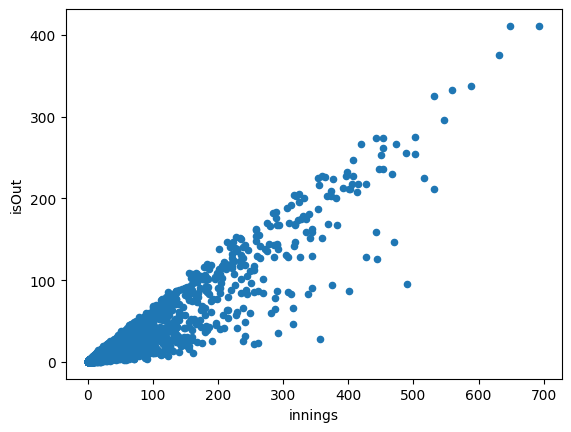

In [ ]:
highest_out.plot(kind='scatter',x='innings',y='isOut')

## *Highest Not Out*

In [ ]:
max_time_no=merged_df[merged_df['wicketType']=='not out'].groupby(['player_name','team'])['wicketType'].count().sort_values(ascending=False).head(10)
max_time_no

,,wicketType
player_name,team,
MS Dhoni,India,83
Chaminda Vaas,Sri Lanka,72
Shaun Pollock,South Africa,70
Michael Bevan,Australia,66
Muthiah Muralidaran,Sri Lanka,62
Chris Harris,New Zealand,62
Abdul Razzaq,Pakistan,57
Mark Boucher,South Africa,57
Steve Waugh,Australia,56


## Top Strike Rates

In [ ]:
sr=batsman_df[(batsman_df['Total Innings']>=30)&(batsman_df['Runs']>=1000)].groupby(['player_name','team'])['SR'].mean().sort_values(ascending=False)
sr.head(10)

,,SR
player_name,team,
Glenn Maxwell,Australia,113.866587
Andre Russell,West Indies,113.135957
Hardik Pandya,India,107.098197
Shahid Afridi,Pakistan,105.118929
Farhaan Behardien,South Africa,103.562857
Michael Leask,Scotland,102.560508
Jos Buttler,England,100.686234
Kedar Jadhav,India,98.945577
James Hopes,Australia,98.871803


# **BOWLING STATISTICS IN ODI**

---



## *Merging Bowling and Players Datasets*

In [ ]:
merged_df2.head()

,Match ID,innings,team,opposition,bowler id,overs,balls,maidens,conceded,wickets,...,player_name,dob,dod,gender,batting_style,bowling_style,country_id,image_url,image_metadata,Age
0,433599,1,West Indies,India,45258.0,10.0,60.0,0.0,51.0,5.0,...,Ravi Rampaul,1984-10-15,NaN,M,left-hand bat,right-arm fast-medium,4.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 203291, 'url': '/db/PICTURES/CMS/203200...","40 years, 2 months, 17 days"
1,446965,1,Australia,England,5966.0,8.0,48.0,0.0,68.0,1.0,...,Brett Lee,1976-11-08,NaN,M,right-hand bat,right-arm fast,2.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 202607, 'url': '/db/PICTURES/CMS/202600...","48 years, 1 months, 26 days"
2,433566,1,Ireland,Bangladesh,47056.0,9.0,54.0,0.0,62.0,0.0,...,Boyd Rankin,1984-07-05,NaN,M,left-hand bat,right-arm fast-medium,29.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 305274, 'url': '/db/PICTURES/CMS/305200...","40 years, 5 months, 28 days"
3,446965,1,Australia,England,45487.0,9.0,54.0,0.0,55.0,0.0,...,Doug Bollinger,1981-07-24,NaN,M,left-hand bat,left-arm fast-medium,2.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 128313, 'url': '/db/PICTURES/CMS/128300...","43 years, 5 months, 10 days"
4,433599,1,West Indies,India,10506.0,4.0,24.0,0.0,32.0,0.0,...,Sulieman Benn,1981-07-22,NaN,M,left-hand bat,slow left-arm orthodox,4.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 238339, 'url': '/db/PICTURES/CMS/238300...","43 years, 5 months, 12 days"


## *Bowling Performance Overview*

In [ ]:
three_w= merged_df2[merged_df2['wickets']>=3]
five_w_h=merged_df2[merged_df2['wickets']>=5]
bowling_df=merged_df2.groupby(['player_name','team','bowling_style']).agg({'innings':"sum","wickets":"sum","maidens":"count","conceded":"sum","economy":"mean"})
bowling_df['Average']=bowling_df['conceded']/bowling_df['wickets']
bowling_df['3+ Wickets']=three_w.groupby(['player_name','team','bowling_style'])['wickets'].count().sort_values(ascending=False)
bowling_df['5+ Wickets']=five_w_h.groupby(['player_name','team','bowling_style'])['wickets'].count().sort_values(ascending=False)
bowling_df.sort_values(by='wickets',ascending=False,inplace=True)
bowling_df.reset_index()

,player_name,team,bowling_style,innings,wickets,maidens,conceded,economy,Average,3+ Wickets,5+ Wickets
0,Muthiah Muralidaran,Sri Lanka,right-arm offbreak,503,523.0,334,12066.0,3.910749,23.070746,67.0,10.0
1,Wasim Akram,Pakistan,left-arm fast,542,502.0,351,11812.0,3.895670,23.529880,76.0,6.0
2,Waqar Younis,Pakistan,right-arm fast,403,416.0,258,9919.0,4.726318,23.843750,53.0,13.0
3,Chaminda Vaas,Sri Lanka,left-arm fast-medium,478,399.0,319,10955.0,4.177524,27.456140,43.0,4.0
4,Shahid Afridi,Pakistan,legbreak googly,549,393.0,369,13572.0,4.769702,34.534351,42.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2160,Mohammad Boota,U.A.E.,right-arm medium,1,0.0,1,10.0,5.000000,inf,NaN,NaN
2161,Misbah-ul-Haq,Pakistan,legbreak,2,0.0,1,30.0,7.500000,inf,NaN,NaN
2162,Milton Shumba,Zimbabwe,slow left-arm orthodox,3,0.0,2,42.0,6.540000,inf,NaN,NaN
2163,Mike Watkinson,England,right-arm medium,2,0.0,1,43.0,4.770000,inf,NaN,NaN


## *Most 5 Wicket Hauls*

In [ ]:
most_fwh=five_w_h.groupby(['player_name','team','bowling_style'])['wickets'].count().sort_values(ascending=False).head(10)
most_fwh

,,,wickets
player_name,team,bowling_style,
Waqar Younis,Pakistan,right-arm fast,13
Muthiah Muralidaran,Sri Lanka,right-arm offbreak,10
Mitchell Starc,Australia,left-arm fast,9
Shahid Afridi,Pakistan,legbreak googly,9
Brett Lee,Australia,right-arm fast,9
Lasith Malinga,Sri Lanka,right-arm fast,8
Glenn McGrath,Australia,right-arm fast-medium,7
Lance Klusener,South Africa,right-arm fast-medium,6
Trent Boult,New Zealand,left-arm fast-medium,6


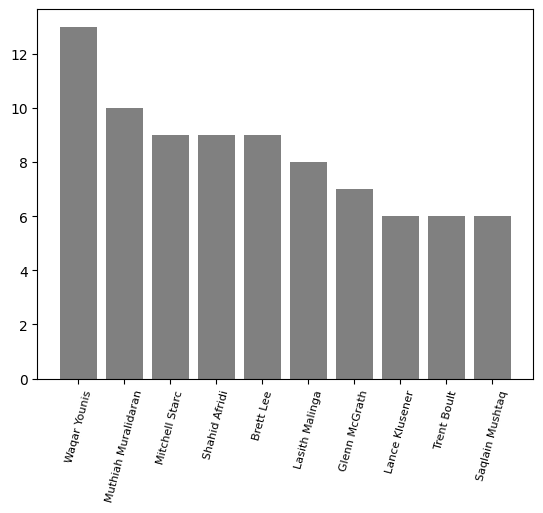

In [ ]:
x=most_fwh.index.get_level_values('player_name')
y=most_fwh.values
plt.bar(x,y,color='grey')
plt.xticks(rotation=75,fontsize=8)
plt.show()

## *Most Maidens*

In [ ]:
merged_df2.head()

,Match ID,innings,team,opposition,bowler id,overs,balls,maidens,conceded,wickets,...,player_name,dob,dod,gender,batting_style,bowling_style,country_id,image_url,image_metadata,Age
0,433599,1,West Indies,India,45258.0,10.0,60.0,0.0,51.0,5.0,...,Ravi Rampaul,1984-10-15,NaN,M,left-hand bat,right-arm fast-medium,4.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 203291, 'url': '/db/PICTURES/CMS/203200...","40 years, 2 months, 17 days"
1,446965,1,Australia,England,5966.0,8.0,48.0,0.0,68.0,1.0,...,Brett Lee,1976-11-08,NaN,M,right-hand bat,right-arm fast,2.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 202607, 'url': '/db/PICTURES/CMS/202600...","48 years, 1 months, 26 days"
2,433566,1,Ireland,Bangladesh,47056.0,9.0,54.0,0.0,62.0,0.0,...,Boyd Rankin,1984-07-05,NaN,M,left-hand bat,right-arm fast-medium,29.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 305274, 'url': '/db/PICTURES/CMS/305200...","40 years, 5 months, 28 days"
3,446965,1,Australia,England,45487.0,9.0,54.0,0.0,55.0,0.0,...,Doug Bollinger,1981-07-24,NaN,M,left-hand bat,left-arm fast-medium,2.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 128313, 'url': '/db/PICTURES/CMS/128300...","43 years, 5 months, 10 days"
4,433599,1,West Indies,India,10506.0,4.0,24.0,0.0,32.0,0.0,...,Sulieman Benn,1981-07-22,NaN,M,left-hand bat,slow left-arm orthodox,4.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 238339, 'url': '/db/PICTURES/CMS/238300...","43 years, 5 months, 12 days"


In [ ]:
maidens=merged_df2.groupby(['player_name','team'])['maidens'].sum().sort_values(ascending=False)
maidens.head(10)

,,maidens
player_name,team,
Shaun Pollock,South Africa,308.0
Glenn McGrath,Australia,279.0
Chaminda Vaas,Sri Lanka,278.0
Wasim Akram,Pakistan,237.0
Kapil Dev,India,235.0
Muthiah Muralidaran,Sri Lanka,195.0
Curtly Ambrose,West Indies,192.0
Courtney Walsh,West Indies,185.0
Richard Hadlee,New Zealand,185.0


In [ ]:
merged_df2['bowling_style'].unique()


array(['right-arm fast-medium', 'right-arm fast', 'left-arm fast-medium',
       'slow left-arm orthodox', 'right-arm medium',
       'right-arm medium-fast', 'legbreak', 'legbreak googly',
       'right-arm offbreak', 'left-arm fast', 'left-arm medium-fast',
       'left-arm medium', nan, 'right-arm slow', 'right-arm bowler',
       'left-arm wrist-spin', 'right-arm slow-medium', 'left-arm slow'],
      dtype=object)

In [ ]:
merged_df2['Pace/Spin'] = 'Other'  # Initialize the 'Genre' column with 'Other' as the default value

# Using DataFrame.loc[] to set values based on the condition
pace_styles = ['right-arm fast-medium', 'right-arm fast', 'left-arm fast-medium', 'right-arm medium',
               'right-arm medium-fast', 'left-arm fast', 'left-arm medium-fast',
               'left-arm medium']
spin_styles = ['slow left-arm orthodox', 'legbreak', 'legbreak googly',
               'right-arm offbreak', 'left-arm wrist-spin', 'left-arm slow']

merged_df2.loc[merged_df2['bowling_style'].isin(pace_styles), 'Pace/Spin'] = 'Pace'
merged_df2.loc[merged_df2['bowling_style'].isin(spin_styles), 'Pace/Spin'] = 'Spin'
merged_df2

,Match ID,innings,team,opposition,bowler id,overs,balls,maidens,conceded,wickets,...,dob,dod,gender,batting_style,bowling_style,country_id,image_url,image_metadata,Age,Pace/Spin
0,433599,1,West Indies,India,45258.0,10.0,60.0,0.0,51.0,5.0,...,1984-10-15,NaN,M,left-hand bat,right-arm fast-medium,4.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 203291, 'url': '/db/PICTURES/CMS/203200...","40 years, 2 months, 17 days",Pace
1,446965,1,Australia,England,5966.0,8.0,48.0,0.0,68.0,1.0,...,1976-11-08,NaN,M,right-hand bat,right-arm fast,2.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 202607, 'url': '/db/PICTURES/CMS/202600...","48 years, 1 months, 26 days",Pace
2,433566,1,Ireland,Bangladesh,47056.0,9.0,54.0,0.0,62.0,0.0,...,1984-07-05,NaN,M,left-hand bat,right-arm fast-medium,29.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 305274, 'url': '/db/PICTURES/CMS/305200...","40 years, 5 months, 28 days",Pace
3,446965,1,Australia,England,45487.0,9.0,54.0,0.0,55.0,0.0,...,1981-07-24,NaN,M,left-hand bat,left-arm fast-medium,2.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 128313, 'url': '/db/PICTURES/CMS/128300...","43 years, 5 months, 10 days",Pace
4,433599,1,West Indies,India,10506.0,4.0,24.0,0.0,32.0,0.0,...,1981-07-22,NaN,M,left-hand bat,slow left-arm orthodox,4.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 238339, 'url': '/db/PICTURES/CMS/238300...","43 years, 5 months, 12 days",Spin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56485,1421072,2,Canada,U.A.E.,57366.0,8.0,48.0,0.0,41.0,1.0,...,1986-11-10,NaN,M,left-hand bat,slow left-arm orthodox,17.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 264081, 'url': '/db/PICTURES/CMS/264000...","38 years, 1 months, 22 days",Spin
56486,1421073,2,Scotland,Canada,97874.0,5.0,30.0,0.0,24.0,0.0,...,2001-05-02,NaN,M,right-hand bat,right-arm medium-fast,30.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 298949, 'url': '/db/PICTURES/CMS/298900...","23 years, 7 months, 27 days",Pace
56487,1421072,2,Canada,U.A.E.,84169.0,9.0,54.0,0.0,33.0,1.0,...,1997-10-24,NaN,M,right-hand bat,right-arm offbreak,17.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 365312, 'url': '/db/PICTURES/CMS/365300...","27 years, 2 months, 6 days",Spin
56488,1421073,2,Scotland,Canada,60198.0,6.0,36.0,1.0,12.0,0.0,...,1990-10-29,NaN,M,right-hand bat,right-arm offbreak,30.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 172875, 'url': '/db/PICTURES/CMS/172800...","34 years, 2 months, 3 days",Spin


## *Top Pacers*

In [ ]:
top_pacers=merged_df2[merged_df2['Pace/Spin']=='Pace'].groupby(['player_name','team'])['wickets'].sum().sort_values(ascending=False).head(10)
top_pacers

,,wickets
player_name,team,
Wasim Akram,Pakistan,502.0
Waqar Younis,Pakistan,416.0
Chaminda Vaas,Sri Lanka,399.0
Shaun Pollock,South Africa,387.0
Brett Lee,Australia,380.0
Glenn McGrath,Australia,380.0
Lasith Malinga,Sri Lanka,338.0
Javagal Srinath,India,315.0
Ajit Agarkar,India,288.0


## *Top Spinners*

In [ ]:
top_spinners=merged_df2[merged_df2['Pace/Spin']=='Spin'].groupby(['player_name','team'])['wickets'].sum().sort_values(ascending=False).head(10)
top_spinners

,,wickets
player_name,team,
Muthiah Muralidaran,Sri Lanka,523.0
Shahid Afridi,Pakistan,393.0
Anil Kumble,India,334.0
Sanath Jayasuriya,Sri Lanka,320.0
Shakib Al Hasan,Bangladesh,317.0
Daniel Vettori,New Zealand,297.0
Shane Warne,Australia,291.0
Saqlain Mushtaq,Pakistan,288.0
Harbhajan Singh,India,265.0


## *Correlation Between Wickets and Economy*

<Axes: xlabel='economy', ylabel='wickets'>

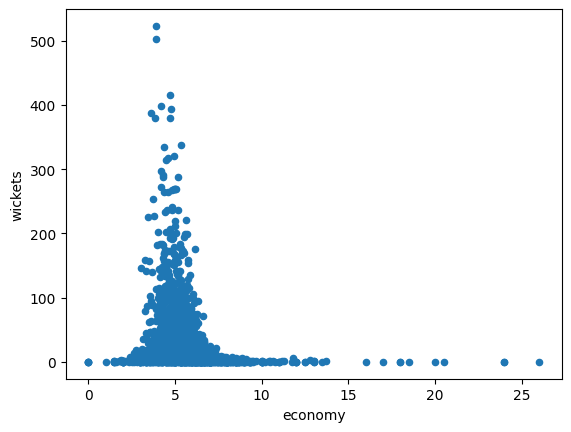

In [ ]:
bowling_df.plot(kind='scatter',x='economy',y='wickets')

## Correlation Bewtween Conceded Runs and Wickets

<Axes: xlabel='conceded', ylabel='wickets'>

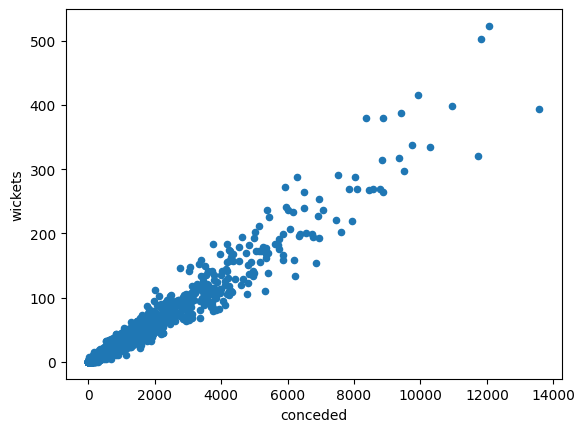

In [ ]:
bowling_df.plot(kind='scatter',x='conceded',y='wickets')

## *Most No Balls*

In [ ]:
most_no_balls=merged_df2.groupby(['player_name','team'])['noballs'].sum().sort_values(ascending=False).head(10)
most_no_balls

,,noballs
player_name,team,
Brett Lee,Australia,337.0
Wasim Akram,Pakistan,323.0
Dilhara Fernando,Sri Lanka,239.0
Javagal Srinath,India,221.0
Shaun Pollock,South Africa,220.0
Abdul Razzaq,Pakistan,216.0
Chaminda Vaas,Sri Lanka,213.0
Shoaib Akhtar,Pakistan,166.0
Darren Gough,England,157.0


# **All-rounder Performance Overview**

## *Merging*

In [ ]:
bat_df=batsman_df[(batsman_df['Runs']>=4000)&(batsman_df['Total Innings']>=50)]
bat_df.reset_index(inplace=True)
bat_df

,index,player_name,team,batting_style,Total Innings,Runs,Out,6s,4s,SR,Centuries,Average,Highest_Score,NotOut,BowledOut,LBW,Caught,Total Half Centuries,Total Centuries
0,0,Sachin Tendulkar,India,right-hand bat,451.0,18426.0,411,195.0,2016.0,74.580332,49,44.832117,200.0,40.0,46.0,39.0,258.0,96.0,49.0
1,1,Kumar Sangakkara,Sri Lanka,left-hand bat,373.0,13975.0,333,86.0,1349.0,71.451153,25,41.966967,169.0,40.0,57.0,22.0,235.0,90.0,25.0
2,2,Virat Kohli,India,right-hand bat,280.0,13848.0,236,151.0,1294.0,80.574214,50,58.677966,183.0,44.0,52.0,16.0,168.0,72.0,50.0
3,3,Ricky Ponting,Australia,right-hand bat,363.0,13589.0,325,159.0,1223.0,69.364286,29,41.812308,164.0,38.0,47.0,34.0,212.0,82.0,29.0
4,4,Sanath Jayasuriya,Sri Lanka,left-hand bat,426.0,13364.0,411,268.0,1493.0,77.564196,28,32.515815,189.0,15.0,24.0,47.0,274.0,68.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,Andrew Strauss,England,left-hand bat,125.0,4205.0,118,25.0,454.0,68.105873,6,35.635593,158.0,7.0,8.0,16.0,73.0,27.0,6.0
116,116,Sikandar Raza,Zimbabwe,right-hand bat,134.0,4154.0,114,103.0,342.0,78.517985,7,36.438596,141.0,20.0,27.0,8.0,77.0,21.0,7.0
117,117,Tom Latham,New Zealand,left-hand bat,134.0,4099.0,117,57.0,346.0,71.761343,7,35.034188,145.0,17.0,28.0,19.0,70.0,24.0,7.0
118,118,Kris Srikkanth,India,right-hand bat,143.0,4091.0,141,41.0,405.0,60.705517,4,29.014184,123.0,2.0,4.0,12.0,82.0,27.0,4.0


In [ ]:
bowl_df=bowling_df[(bowling_df['wickets']>=100)&(bowling_df['innings']>=50)]
bowl_df.reset_index(inplace=True)
bowl_df

,player_name,team,bowling_style,innings,wickets,maidens,conceded,economy,Average,3+ Wickets,5+ Wickets
0,Muthiah Muralidaran,Sri Lanka,right-arm offbreak,503,523.0,334,12066.0,3.910749,23.070746,67.0,10.0
1,Wasim Akram,Pakistan,left-arm fast,542,502.0,351,11812.0,3.895670,23.529880,76.0,6.0
2,Waqar Younis,Pakistan,right-arm fast,403,416.0,258,9919.0,4.726318,23.843750,53.0,13.0
3,Chaminda Vaas,Sri Lanka,left-arm fast-medium,478,399.0,319,10955.0,4.177524,27.456140,43.0,4.0
4,Shahid Afridi,Pakistan,legbreak googly,549,393.0,369,13572.0,4.769702,34.534351,42.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
162,Charl Langeveldt,South Africa,right-arm fast-medium,96,100.0,71,2962.0,5.123380,29.620000,13.0,2.0
163,Ray Price,Zimbabwe,slow left-arm orthodox,149,100.0,99,3575.0,4.051010,35.750000,7.0,NaN
164,David Willey,England,left-arm fast-medium,108,100.0,72,2975.0,5.499444,29.750000,13.0,1.0
165,Roger Harper,West Indies,right-arm offbreak,142,100.0,99,3431.0,4.130606,34.310000,9.0,NaN


In [ ]:
merged_3=pd.merge(bat_df,bowl_df,on='player_name',how='inner')
merged_3

,index,player_name,team_x,batting_style,Total Innings,Runs,Out,6s,4s,SR,...,team_y,bowling_style,innings,wickets,maidens,conceded,economy,Average_y,3+ Wickets,5+ Wickets
0,0,Sachin Tendulkar,India,right-hand bat,451.0,18426.0,411,195.0,2016.0,74.580332,...,India,right-arm offbreak,394,154.0,270,6850.0,5.751407,44.480519,14.0,2.0
1,4,Sanath Jayasuriya,Sri Lanka,left-hand bat,426.0,13364.0,411,268.0,1493.0,77.564196,...,Sri Lanka,slow left-arm orthodox,548,320.0,365,11737.0,4.970329,36.678125,32.0,4.0
2,7,Jacques Kallis,South Africa,right-hand bat,308.0,11550.0,256,137.0,910.0,63.966861,...,South Africa,right-arm fast-medium,405,269.0,279,8568.0,5.036953,31.851301,23.0,2.0
3,8,Sourav Ganguly,India,left-hand bat,295.0,11221.0,274,189.0,1104.0,64.734747,...,India,right-arm medium,250,100.0,170,3835.0,6.046529,38.350000,11.0,2.0
4,12,Chris Gayle,West Indies,left-hand bat,290.0,10425.0,274,330.0,1120.0,74.787869,...,West Indies,right-arm offbreak,285,167.0,197,5868.0,5.378020,35.137725,16.0,1.0
5,14,Tillakaratne Dilshan,Sri Lanka,right-hand bat,303.0,10290.0,262,55.0,1111.0,81.505842,...,Sri Lanka,right-arm offbreak,324,106.0,204,4778.0,5.255735,45.075472,9.0,NaN
6,19,Aravinda de Silva,Sri Lanka,right-hand bat,296.0,9284.0,266,102.0,712.0,72.227939,...,Sri Lanka,right-arm offbreak,229,106.0,156,4177.0,5.285962,39.405660,7.0,NaN
7,23,Yuvraj Singh,India,left-hand bat,275.0,8609.0,236,153.0,896.0,77.842509,...,India,slow left-arm orthodox,227,110.0,158,4227.0,5.543734,38.427273,9.0,1.0
8,30,Shahid Afridi,Pakistan,right-hand bat,364.0,8027.0,337,349.0,725.0,105.118929,...,Pakistan,legbreak googly,549,393.0,369,13572.0,4.769702,34.534351,42.0,9.0
9,35,Shakib Al Hasan,Bangladesh,left-hand bat,233.0,7570.0,203,54.0,699.0,74.941496,...,Bangladesh,slow left-arm orthodox,353,317.0,241,9360.0,4.626141,29.526814,32.0,4.0


## Top 10 All rounder

In [ ]:

all_rounder=merged_3.groupby(['player_name','team_x']).agg({"Total Innings":"sum","Runs":"sum","Average_x":"sum","SR":"sum","Total Centuries":"sum","wickets":"sum","Average_y":"sum",'Total Half Centuries':'sum',"Total Centuries":"sum","SR":"sum","economy":"sum",'3+ Wickets':'sum',"5+ Wickets":"sum"})
all_rounder.reset_index(inplace=True)
all_rounder=all_rounder.rename(columns={"player_name":"Name","team_x":"Country","Average_x":"Batting Average","wickets":"Wickets","Average_y":"Bowling Average","economy":"Economy"})
all_rounder["contribution"]=((all_rounder['Runs']/all_rounder['Total Innings'])+(all_rounder['Wickets']/all_rounder['Total Innings']))
all_rounder.sort_values(by='contribution',ascending=False,inplace=True)

all_rounder.head(10)


,Name,Country,Total Innings,Runs,Batting Average,SR,Total Centuries,Wickets,Bowling Average,Total Half Centuries,Economy,3+ Wickets,5+ Wickets,contribution
13,Sachin Tendulkar,India,451.0,18426.0,44.832117,74.580332,49.0,154.0,44.480519,96.0,5.751407,14.0,2.0,41.197339
23,Viv Richards,West Indies,167.0,6721.0,47.000000,85.411497,11.0,118.0,35.830508,45.0,4.732137,13.0,2.0,40.952096
20,Sourav Ganguly,India,295.0,11221.0,40.952555,64.734747,22.0,100.0,38.350000,71.0,6.046529,11.0,2.0,38.376271
10,Jacques Kallis,South Africa,308.0,11550.0,45.117188,63.966861,17.0,269.0,31.851301,86.0,5.036953,23.0,2.0,38.373377
6,Chris Gayle,West Indies,290.0,10425.0,38.047445,74.787869,25.0,167.0,35.137725,53.0,5.378020,16.0,1.0,36.524138
18,Shane Watson,Australia,169.0,5757.0,40.542254,83.735740,9.0,168.0,31.797619,33.0,4.968773,15.0,0.0,35.059172
22,Tillakaratne Dilshan,Sri Lanka,303.0,10290.0,39.274809,81.505842,22.0,106.0,45.075472,47.0,5.255735,9.0,0.0,34.310231
17,Shakib Al Hasan,Bangladesh,233.0,7570.0,37.290640,74.941496,9.0,317.0,29.526814,56.0,4.626141,32.0,4.0,33.849785
1,Andrew Symonds,Australia,160.0,5088.0,39.750000,83.088447,6.0,133.0,37.255639,30.0,5.182911,9.0,1.0,32.631250
9,Hansie Cronje,South Africa,175.0,5565.0,38.645833,73.566800,2.0,114.0,34.789474,39.0,4.710261,8.0,1.0,32.451429


<Axes: xlabel='Batting Average', ylabel='Bowling Average'>

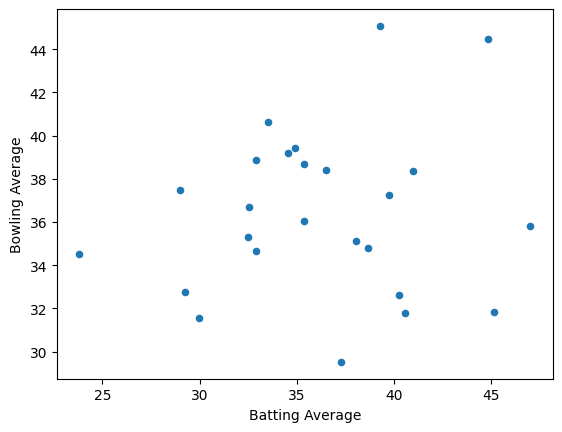

In [ ]:
all_rounder.plot(kind='scatter',x='Batting Average',y='Bowling Average')

## *Correlation Between Wickets and Runs*

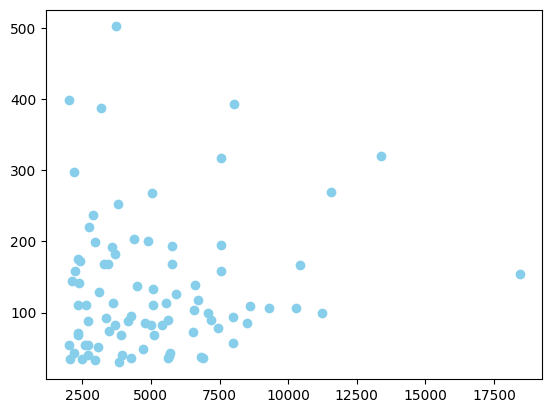

In [ ]:
x=merged_3['Runs']
y=merged_3['wickets']
plt.scatter(x,y,color='skyblue')

plt.show()

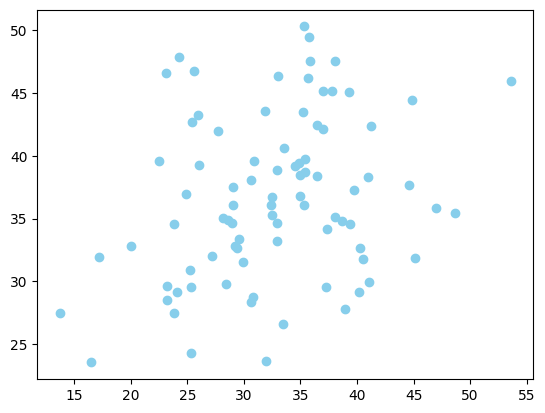

In [ ]:
x=all_rounder['Batting Average']
y=all_rounder['Bowling Average']
plt.scatter(x,y,color='skyblue')
plt.show()

## *THE OG All-Rounders*

In [ ]:
best_ar=all_rounder[(all_rounder["Runs"]>=5000) & (all_rounder["Wickets"]>=100)]
best_ar

,Name,Country,Total Innings,Runs,Batting Average,SR,Total Centuries,Wickets,Bowling Average,Economy,5+ Wickets,contribution
63,Sachin Tendulkar,India,451.0,18426.0,44.832117,74.580332,49.0,154.0,44.480519,5.751407,2.0,44.656318
80,Tillakaratne Dilshan,Sri Lanka,303.0,10290.0,39.274809,81.505842,22.0,106.0,45.075472,5.255735,0.0,42.175140
82,Viv Richards,West Indies,167.0,6721.0,47.000000,85.411497,11.0,118.0,35.830508,4.732137,2.0,41.415254
74,Sourav Ganguly,India,295.0,11221.0,40.952555,64.734747,22.0,100.0,38.350000,6.046529,2.0,39.651277
4,Andrew Symonds,Australia,160.0,5088.0,39.750000,83.088447,6.0,133.0,37.255639,5.182911,1.0,38.502820
34,Jacques Kallis,South Africa,308.0,11550.0,45.117188,63.966861,17.0,269.0,31.851301,5.036953,2.0,38.484244
84,Yuvraj Singh,India,275.0,8609.0,36.478814,77.842509,14.0,110.0,38.427273,5.543734,1.0,37.453043
6,Aravinda de Silva,Sri Lanka,296.0,9284.0,34.902256,72.227939,11.0,106.0,39.405660,5.285962,0.0,37.153958
25,Grant Flower,Zimbabwe,214.0,6571.0,33.525510,56.988972,6.0,104.0,40.625000,4.994744,0.0,37.075255
54,Paul Collingwood,England,181.0,5092.0,35.361111,72.613646,5.0,111.0,38.684685,5.336821,1.0,37.022898


# **New Generation Players**

In [ ]:
players.head(5)

,player_id,player_object_id,player_name,dob,dod,gender,batting_style,bowling_style,country_id,image_url,image_metadata,Age
0,93957,1046619,Avinash Pai,1982-01-24,NaN,M,right-hand bat,right-arm offbreak,18.0,NaN,NaN,"42 years, 11 months, 9 days"
1,2182,51462,Sherwin Campbell,1970-11-01,NaN,M,right-hand bat,right-arm medium,4.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 326616, 'url': '/db/PICTURES/CMS/326600...","54 years, 2 months, 5 days"
2,48391,56194,Tamim Iqbal,1989-03-20,NaN,M,left-hand bat,NaN,25.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 303166, 'url': '/db/PICTURES/CMS/303100...","35 years, 9 months, 13 days"
3,2198,55935,Javed Omar,1976-11-25,NaN,M,right-hand bat,legbreak,25.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 302990, 'url': '/db/PICTURES/CMS/302900...","48 years, 1 months, 9 days"
4,52290,298438,Jason Roy,1990-07-21,NaN,M,right-hand bat,NaN,1.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 303963, 'url': '/db/PICTURES/CMS/303900...","34 years, 5 months, 11 days"


In [ ]:
new_gen=players[players['dob']>='1997-01-01']
new_gen.head(2)

,player_id,player_object_id,player_name,dob,dod,gender,batting_style,bowling_style,country_id,image_url,image_metadata,Age
5,87157,938959,Wessly Madhevere,2000-09-04,NaN,M,right-hand bat,right-arm offbreak,9.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 324710, 'url': '/db/PICTURES/CMS/324700...","24 years, 3 months, 24 days"
10,109868,1274033,Louis Bruce,2005-06-25,NaN,M,right-hand bat,right-arm medium,18.0,NaN,NaN,"19 years, 6 months, 3 days"


In [ ]:
merged_df.head(2)

,Match ID,innings,team,batsman,runs,balls,fours,sixes,strikeRate,isOut,...,player_name,dob,dod,gender,batting_style,bowling_style,country_id,image_url,image_metadata,Age
0,64381,1,Sri Lanka,1810.0,5.0,17.0,0.0,0.0,29.41,1,...,Roshan Mahanama,1966-05-31,NaN,M,right-hand bat,NaN,8.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 304915, 'url': '/db/PICTURES/CMS/304900...","58 years, 7 months, 7 days"
1,64357,1,Pakistan,1981.0,35.0,48.0,2.0,0.0,72.91,1,...,Saeed Anwar,1968-09-06,NaN,M,left-hand bat,slow left-arm orthodox,7.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 21439, 'url': '/db/PICTURES/DB/052004/0...","56 years, 4 months, 0 days"


In [ ]:
new_gen_bat=merged_df[merged_df['dob']>='1985-01-01']
new_gen_bat.head(2)

,Match ID,innings,team,batsman,runs,balls,fours,sixes,strikeRate,isOut,...,player_name,dob,dod,gender,batting_style,bowling_style,country_id,image_url,image_metadata,Age
24,433579,1,England,44691.0,60.0,98.0,3.0,1.0,61.22,1,...,Ravi Bopara,1985-05-04,NaN,M,right-hand bat,right-arm medium,1.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 304007, 'url': '/db/PICTURES/CMS/304000...","39 years, 7 months, 29 days"
27,433579,1,England,34739.0,1.0,4.0,0.0,0.0,25.00,1,...,Tim Bresnan,1985-02-28,NaN,M,right-hand bat,right-arm medium-fast,1.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 305003, 'url': '/db/PICTURES/CMS/305000...","39 years, 10 months, 3 days"


In [ ]:
new_gen_bat_df=new_gen_bat.groupby(['player_name','team']).agg({'Match ID':'count','runs':'sum','isOut':'sum','sixes':'sum','fours':'sum','strikeRate':'mean',"Centuries":"sum"}).sort_values(by='runs',ascending=False)
new_gen_bat_df['Average']=new_gen_bat_df['runs']/new_gen_bat_df['isOut']
new_gen_bat_df['Highest Score']=new_gen_bat.groupby(['player_name','team'])['runs'].max()
new_gen_bat_df.fillna(0,inplace=True)
new_gen_bat_df.replace([np.inf, -np.inf], 0, inplace=True)
new_gen_bat_df['Average'].astype(int)
new_gen_bat_df['Highest Score'].astype(int)
new_gen_bat_df['Total Boundaries']=new_gen_bat_df['sixes']+new_gen_bat_df['fours']
new_gen_bat_df['Boundaries/Match']=new_gen_bat_df['Total Boundaries']/new_gen_bat_df['Match ID']
new_gen_bat_df['Boundaries/Match'].mean()
new_gen_bat_df['strikeRate'].mean()

62.70733109250052

<Axes: xlabel='Match ID', ylabel='Total Boundaries'>

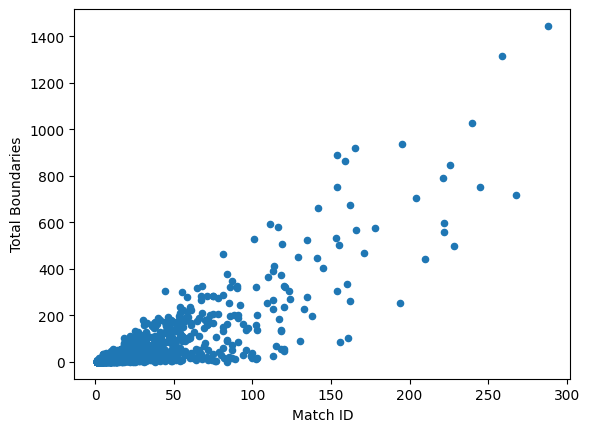

In [ ]:
new_gen_bat_df.plot(kind='scatter',x='Match ID',y='Total Boundaries')

In [ ]:
old_gen=merged_df[merged_df['dob']<'1985-01-02']
old_gen.head(2)

,Match ID,innings,team,batsman,runs,balls,fours,sixes,strikeRate,isOut,...,player_name,dob,dod,gender,batting_style,bowling_style,country_id,image_url,image_metadata,Age
0,64381,1,Sri Lanka,1810.0,5.0,17.0,0.0,0.0,29.41,1,...,Roshan Mahanama,1966-05-31,NaN,M,right-hand bat,NaN,8.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 304915, 'url': '/db/PICTURES/CMS/304900...","58 years, 7 months, 7 days"
1,64357,1,Pakistan,1981.0,35.0,48.0,2.0,0.0,72.91,1,...,Saeed Anwar,1968-09-06,NaN,M,left-hand bat,slow left-arm orthodox,7.0,"https://img1.hscicdn.com/image/upload/f_auto,t...","{'id': 21439, 'url': '/db/PICTURES/DB/052004/0...","56 years, 4 months, 0 days"


In [ ]:
old_gen_bat=old_gen.groupby(['player_name','team']).agg({'Match ID':"count",'runs':'sum','isOut':'sum','sixes':'sum','fours':'sum','strikeRate':'mean',"Centuries":"sum"}).sort_values(by='runs',ascending=False)

In [ ]:
old_gen_bat['Total Boundaries']=old_gen_bat['sixes']+old_gen_bat['fours']
old_gen_bat['Boundaries/Match']=old_gen_bat['Total Boundaries']/old_gen_bat['Match ID']
old_gen_bat['Boundaries/Match'].mean()
old_gen_bat['strikeRate'].mean()


57.14309093739275

<Axes: xlabel='Match ID', ylabel='Total Boundaries'>

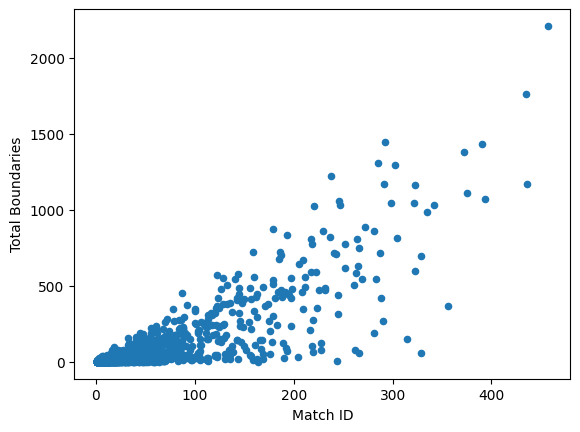

In [ ]:
old_gen_bat.plot(kind='scatter',x='Match ID',y='Total Boundaries')

In [ ]:
new_gen_bat_df

,,Match ID,runs,isOut,sixes,fours,strikeRate,Centuries,Average,Highest Score,Total Boundaries,Boundaries/Match
player_name,team,,,,,,,,,,,
Virat Kohli,India,288,13848.0,236,151.0,1294.0,80.574214,50,58.677966,183.0,1445.0,5.017361
Rohit Sharma,India,259,10709.0,218,323.0,994.0,75.745906,31,49.123853,264.0,1317.0,5.084942
Tamim Iqbal,Bangladesh,240,8357.0,228,103.0,925.0,69.596750,14,36.653509,158.0,1028.0,4.283333
Mushfiqur Rahim,Bangladesh,268,7792.0,211,100.0,617.0,71.521621,9,36.928910,144.0,717.0,2.675373
Shakib Al Hasan,Bangladesh,245,7570.0,203,54.0,699.0,74.941496,9,37.290640,134.0,753.0,3.073469
...,...,...,...,...,...,...,...,...,...,...,...,...
McLaren Smith,Bermuda,1,0.0,0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,0.000000
Ben White,Ireland,2,0.0,0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,0.000000
Mohammad Abbas,Pakistan,3,0.0,0,0.0,0.0,0.000000,0,0.000000,0.0,0.0,0.000000


### New Gen Bowlers

In [ ]:
new_gen_bowl=merged_df2[merged_df2['dob']>='1990-01-01']

In [ ]:
pd.options.display.max_columns= 999
new_gen_bowl=new_gen_bowl.groupby(['player_name','team']).agg({'innings':"sum","wickets":"sum","conceded":"sum","economy":"mean",'maidens':'sum'})
new_gen_bowl.sort_values(by='wickets',ascending=False,inplace=True)
new_gen_bowl.reset_index(inplace=True)
new_gen_bowl.head(10)

,player_name,team,innings,wickets,conceded,economy,maidens
0,Mitchell Starc,Australia,190,236.0,5373.0,5.176083,1
1,Mohammed Shami,India,142,195.0,4618.0,5.503500,1
2,Rashid Khan,Afghanistan,152,183.0,3748.0,4.231939,1
3,Adam Zampa,Australia,149,169.0,4742.0,5.513434,1
4,Kuldeep Yadav,India,148,168.0,4370.0,4.931900,1
5,Mustafizur Rahman,Bangladesh,157,164.0,4307.0,5.105243,1
6,Jason Holder,West Indies,196,159.0,5878.0,5.751642,1
7,Kagiso Rabada,South Africa,149,157.0,4361.0,5.060909,1
8,Jasprit Bumrah,India,124,149.0,3509.0,4.504432,1
9,Matt Henry,New Zealand,118,141.0,3722.0,5.226750,1


In [ ]:
merged_df2[merged_df2['player_name']== 'Jasprit Bumrah'].agg({'innings':"sum","wickets":"sum","maidens":"sum","conceded":"sum","economy":"mean"})

,0
innings,124.000000
wickets,149.000000
maidens,57.000000
conceded,3509.000000
economy,4.504432
